In [147]:
import darts
import pandas as pd
import wapi
from darts.models.forecasting.rnn_model import RNNModel
from darts import TimeSeries
from tqdm import tqdm
from darts.metrics import mape, mase, mae
from matplotlib import pyplot as plt

In [148]:
temperature = [
        "tt ch grimsel test °c cet h s",
        "tt ch adelboden test °c cet h s",
        "tt ch geneve test °c cet h s",
        "tt ch davos test °c cet h s",
        "tt ch engelberg test °c cet h s",
        "tt ch bern test °c cet h s",
        "tt ch lugano test °c cet h s",
        "tt ch zurich test °c cet h s",
        "tt ch samedan test °c cet h s",
]

windspeed = [
    'ff ch grimsel test m/s cet h s',
    'ff ch adelboden test m/s cet h s',
    'ff ch geneve test m/s cet h s',
    'ff ch davos test m/s cet h s',
    'ff ch engelberg test m/s cet h s',
    'ff ch bern test m/s cet h s',
    'ff ch lugano test m/s cet h s',
    'ff ch zurich test m/s cet h s',
    'ff ch samedan test m/s cet h s'
]

cloud_coverage = [
    'cc ch grimsel test % cet h s',
    'cc ch adelboden test % cet h s',
    'cc ch geneve test % cet h s',
    'cc ch davos test % cet h s',
    'cc ch engelberg test % cet h s',
    'cc ch bern test % cet h s',
    'cc ch lugano test % cet h s',
    'cc ch zurich test % cet h s',
    'cc ch samedan test % cet h s'
]

In [149]:
features = [temperature, windspeed, cloud_coverage]

In [150]:
session = wapi.Session(client_id="yf24xCq95gJkorzBWb16GAP4eOxQNVZR", client_secret="sWkUzN3a8uC8QDu1V64bH3bAtCdduf74Xh8JnT_OrYZf_x2ObWdiNkOga59cB2C5Q9us9tW0bg4zFg4BfeOR7mRzui3ROZ1QHI0i")

mean_features = []

for feature in features:

    dfs = []

    for c in tqdm(feature):
        print(c)
        curve = session.get_curve(name=c)
        dfs.append(curve.get_data(data_from= '2015-01-01', data_to='2020-12-05', frequency='h', function ="AVERAGE").to_pandas())
    
    mean = pd.concat(dfs, axis=1).mean(axis=1)

    mean_features.append(mean)

pd.concat(mean_features, axis=1)

tt ch grimsel test °c cet h s


c:\Users\cleme\anaconda3\envs\PAI\envs\ML\Lib\site-packages\wapi\util.py:135: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return res.asfreq(self._map_freq(self.frequency))


tt ch adelboden test °c cet h s


tt ch geneve test °c cet h s


tt ch davos test °c cet h s


tt ch engelberg test °c cet h s


tt ch bern test °c cet h s


tt ch lugano test °c cet h s


tt ch zurich test °c cet h s


tt ch samedan test °c cet h s


100%|██████████| 9/9 [00:21<00:00,  2.37s/it]


ff ch grimsel test m/s cet h s


c:\Users\cleme\anaconda3\envs\PAI\envs\ML\Lib\site-packages\wapi\util.py:135: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return res.asfreq(self._map_freq(self.frequency))


ff ch adelboden test m/s cet h s


ff ch geneve test m/s cet h s


ff ch davos test m/s cet h s


ff ch engelberg test m/s cet h s


ff ch bern test m/s cet h s


ff ch lugano test m/s cet h s


ff ch zurich test m/s cet h s


ff ch samedan test m/s cet h s


100%|██████████| 9/9 [00:21<00:00,  2.40s/it]


cc ch grimsel test % cet h s


c:\Users\cleme\anaconda3\envs\PAI\envs\ML\Lib\site-packages\wapi\util.py:135: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return res.asfreq(self._map_freq(self.frequency))


cc ch adelboden test % cet h s


cc ch geneve test % cet h s


cc ch davos test % cet h s


cc ch engelberg test % cet h s


cc ch bern test % cet h s


cc ch lugano test % cet h s


cc ch zurich test % cet h s


cc ch samedan test % cet h s


100%|██████████| 9/9 [00:19<00:00,  2.19s/it]


,0,1,2
2015-01-01 00:00:00+01:00,-7.544444,1.144444,27.833333
2015-01-01 01:00:00+01:00,-7.677778,1.066667,25.644444
2015-01-01 02:00:00+01:00,-7.722222,0.977778,23.922222
2015-01-01 03:00:00+01:00,-7.822222,0.944444,22.144444
2015-01-01 04:00:00+01:00,-7.855556,0.944444,20.311111
...,...,...,...
2020-12-04 19:00:00+01:00,-3.688889,1.411111,96.722222
2020-12-04 20:00:00+01:00,-3.644444,1.322222,97.611111
2020-12-04 21:00:00+01:00,-3.688889,1.355556,98.777778
2020-12-04 22:00:00+01:00,-3.722222,1.444444,97.744444


In [151]:
normal_pv_production = session.get_curve(name='pro ch spv mwh/h cet min15 n')
normal_pv_production = normal_pv_production.get_data(data_from= '2015-01-01', data_to='2020-12-05', frequency='h', function ="AVERAGE").to_pandas()

target = session.get_curve(name='pro ch spv mwh/h cet min15 a')
target = target.get_data(data_from= '2015-01-01', data_to='2020-12-05', frequency='h', function ="AVERAGE").to_pandas()

c:\Users\cleme\anaconda3\envs\PAI\envs\ML\Lib\site-packages\wapi\util.py:135: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return res.asfreq(self._map_freq(self.frequency))


In [153]:
dataset = pd.concat(mean_features + [normal_pv_production, target], axis=1)
dataset.columns = ['temperature', 'windspeed', 'cloud_coverage', 'normal', 'target']
dataset

,temperature,windspeed,cloud_coverage,normal,target
2015-01-01 00:00:00+01:00,-7.544444,1.144444,27.833333,0.000000,0.0
2015-01-01 01:00:00+01:00,-7.677778,1.066667,25.644444,0.000000,0.0
2015-01-01 02:00:00+01:00,-7.722222,0.977778,23.922222,0.000000,0.0
2015-01-01 03:00:00+01:00,-7.822222,0.944444,22.144444,0.000000,0.0
2015-01-01 04:00:00+01:00,-7.855556,0.944444,20.311111,0.000000,0.0
...,...,...,...,...,...
2020-12-04 19:00:00+01:00,-3.688889,1.411111,96.722222,0.008839,0.0
2020-12-04 20:00:00+01:00,-3.644444,1.322222,97.611111,0.000158,0.0
2020-12-04 21:00:00+01:00,-3.688889,1.355556,98.777778,0.000000,0.0
2020-12-04 22:00:00+01:00,-3.722222,1.444444,97.744444,0.000000,0.0


In [154]:
def change_time_change(pd_dataframe):
    #make the index as a column called timestep
    pd_dataframe['timestamp'] = pd_dataframe.index
    pd_dataframe = pd_dataframe.reset_index(drop=True)

    pd_dataframe['timestamp'] = pd.to_datetime(pd_dataframe.timestamp).dt.tz_localize(None)

    pd_dataframe['time_diff'] = pd_dataframe['timestamp'].diff()
    indexes_not_hourly = pd_dataframe[pd_dataframe["time_diff"] != pd.Timedelta('0 days 01:00:00')]
    indexes = indexes_not_hourly.index.tolist()

    shifted_df = pd_dataframe.copy()

    for i in range(len(indexes)-1):
        index = indexes[i]
        end_index = indexes [i+1] if i+1 < len(indexes) else len(pd_dataframe)

        end_index -= 1

        if pd_dataframe.loc[index]["timestamp"].month == 3:


            #shift from start_index to end_index the datetime by 1 hour and delete the where the time_diff is 0 days 00:00:00

            shifted_df.loc[index:end_index, 'timestamp'] = pd_dataframe.loc[index:end_index, 'timestamp'] - pd.Timedelta('1 hours')

    shifted_df_numeric = shifted_df.select_dtypes(include=['float64', 'int64'])

    return TimeSeries.from_dataframe(shifted_df, "timestamp", shifted_df_numeric.columns, fill_missing_dates=True, freq='H')

In [155]:
dataset = change_time_change(dataset)

c:\Users\cleme\anaconda3\envs\PAI\envs\ML\Lib\site-packages\darts\timeseries.py:4736: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)


In [127]:
from darts.dataprocessing.transformers import (
    Scaler,
    MissingValuesFiller,
    Mapper,
    InvertibleMapper,
)

scaler = Scaler()
rescaled = scaler.fit_transform(dataset)

In [128]:
train, val = rescaled.split_after(0.8)
train_target, val_target = train.univariate_component(3), val.univariate_component(3)
train_coev, val_coev = train.drop_columns("target"), val.drop_columns("target")

test_coev = rescaled.drop_columns("target")
test_series = rescaled.univariate_component(3)

In [179]:
from darts.models import RegressionModel
from darts.models.forecasting.lgbm import LightGBMModel

model = LightGMBModel(
    lags=12,
    lags_past_covariates=12,
    output_chunk_length=6,
)
model.fit(train_target, past_covariates=train_coev)

ModuleNotFoundError: No module named 'lightgbm'

In [174]:
predictions = model.predict(len(val), series=train_target, past_covariates=test_coev)

`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.


In [175]:
from darts.metrics import mape
from darts.metrics import mase

#score_reg = mase(val,pred_reg, train)
score_xgb = mase(val['target'], predictions, train['target'])
#print(score_reg)
print(score_xgb)

5.5057092588968475


<Axes: xlabel='timestamp'>

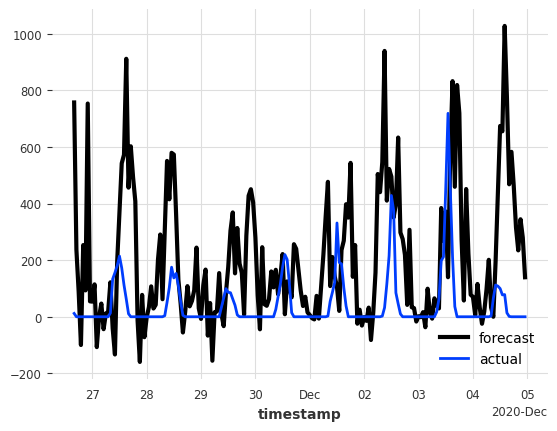

In [132]:
back_scaled = scaler.inverse_transform(val.drop_columns('target').concatenate(predictions, axis=1))
back_scaled[-200:]['target'].plot(label='forecast', lw=3)
scaler.inverse_transform(val)['target'][-200:].plot(label='actual')